In [1]:
import scipy
from scipy import stats
from scipy.stats import rv_continuous
from scipy.integrate import quad
from scipy.interpolate import interp1d

## Gaussians first

In [110]:
class gaussian_gen(rv_continuous):
    "Gaussian distribution"
    def _pdf(self, x):
        return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)

class gaussian_cdf_gen(rv_continuous):
    "Gaussian distribution built from cdf"
    def _cdf(self, x, mu, sigma):
        return stats.norm.cdf(x, loc=mu, scale=sigma)

class beta_cdf_gen(rv_continuous):
    "beta distribution built from cdf"
    def _cdf(self, x, a, b):
        return stats.beta.cdf(x, a, b)
    
class gaussian_cdf_gen2(rv_continuous):
    "Gaussian distribution built from cdf"
    def _cdf(self, x):
        return stats.norm.cdf(x)
    
class gaussian_param_gen(rv_continuous):
    "Gaussian distribution parametrized"
    def _pdf(self, x, mu, sigma):
#         return np.exp(-(x-mu)**2 / (2*sigma**2)) / (np.sqrt(2 * np.pi)* sigma)  # getting OverflowError: (34, 'Numerical result out of range') error when trying to sample
        return stats.norm.pdf(x, loc=mu, scale=sigma)
gaussian = gaussian_gen(name='gaussian')
# gaussian_param = gaussian_gen(name='gaussian_param')
gaussian_param = gaussian_param_gen(name='gaussian_param')
gaussian_cdf = gaussian_cdf_gen()
gaussian_cdf2 = gaussian_cdf_gen2()

beta_cdf = beta_cdf_gen()
gaussian.numargs, gaussian_param.numargs, gaussian_cdf.numargs, gaussian_cdf2.numargs, beta_cdf.numargs

(0, 2, 2, 0, 2)

In [111]:
gaussian.shapes, gaussian_param.shapes, gaussian_cdf.shapes, gaussian_cdf2.shapes, beta_cdf.shapes

(None, 'mu, sigma', 'mu, sigma', None, 'a, b')

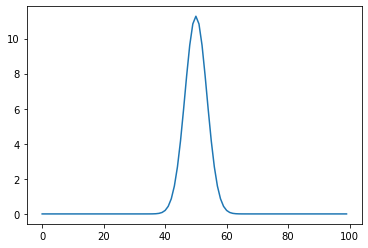

In [119]:
xs = arange(0,1,.01)
plot(beta_cdf.pdf(xs, a=100, b=100))

In [120]:
beta_samples = beta_cdf.rvs(a=100, b=100, size=5000)

(array([  4.,   5.,   7.,  24.,  57.,  94., 122., 179., 223., 333., 399.,
        462., 490., 454., 465., 437., 396., 246., 206., 160.,  97.,  79.,
         28.,  20.,   6.,   4.,   1.,   1.,   0.,   1.]),
 array([0.38210598, 0.39095418, 0.39980239, 0.4086506 , 0.41749881,
        0.42634702, 0.43519522, 0.44404343, 0.45289164, 0.46173985,
        0.47058805, 0.47943626, 0.48828447, 0.49713268, 0.50598088,
        0.51482909, 0.5236773 , 0.53252551, 0.54137372, 0.55022192,
        0.55907013, 0.56791834, 0.57676655, 0.58561475, 0.59446296,
        0.60331117, 0.61215938, 0.62100758, 0.62985579, 0.638704  ,
        0.64755221]),
 <BarContainer object of 30 artists>)

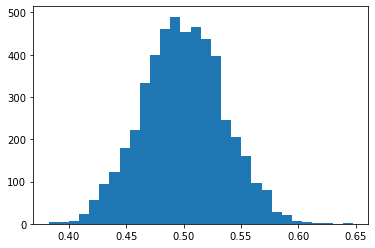

In [121]:
hist(beta_samples, bins=30)

In [124]:
beta_cdf.fit(beta_samples)

(6.548243421876911, 6.896041931620353, 0.36811917782119186, 0.2704112533010832)

In [123]:
beta_cdf.fit(beta_samples, floc=0, fscale=1)

(98.93754512315459, 99.18369690663638, 0, 1)

In [9]:
gaussian_samples = gaussian.rvs(size=5000)

In [13]:
pkg_gaussian_param_samples = stats.norm.rvs(4,3,size=5000)

In [14]:
gaussian_param_samples = gaussian_param.rvs(4, 3, size=80)

/home/homero/software/miniconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:243: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C


RuntimeError: Failed to converge after 100 iterations.

In [22]:
samples_gaussian_cdf = gaussian_cdf.rvs(40, 30, size=5000)

(array([  3.,   0.,   5.,   3.,   6.,  22.,  51.,  77., 118., 157., 249.,
        344., 384., 429., 473., 482., 457., 409., 413., 310., 216., 155.,
         96.,  64.,  30.,  24.,  14.,   2.,   4.,   3.]),
 array([-7.36003424e+01, -6.62408537e+01, -5.88813649e+01, -5.15218762e+01,
        -4.41623875e+01, -3.68028988e+01, -2.94434100e+01, -2.20839213e+01,
        -1.47244326e+01, -7.36494387e+00, -5.45514718e-03,  7.35403358e+00,
         1.47135223e+01,  2.20730110e+01,  2.94324997e+01,  3.67919885e+01,
         4.41514772e+01,  5.15109659e+01,  5.88704546e+01,  6.62299434e+01,
         7.35894321e+01,  8.09489208e+01,  8.83084095e+01,  9.56678983e+01,
         1.03027387e+02,  1.10386876e+02,  1.17746364e+02,  1.25105853e+02,
         1.32465342e+02,  1.39824831e+02,  1.47184319e+02]),
 <BarContainer object of 30 artists>)

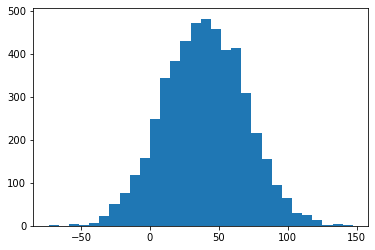

In [23]:
hist(samples_gaussian_cdf, bins=30)

In [98]:
samples_gaussian_cdf2 = gaussian_cdf2.rvs(40, 30, size=5000)

(array([  2.,   2.,   0.,   1.,   9.,  31.,  52.,  85., 158., 251., 313.,
        374., 491., 540., 581., 514., 472., 404., 258., 176., 134.,  71.,
         39.,  28.,   5.,   6.,   2.,   0.,   0.,   1.]),
 array([-77.80529605, -69.51697392, -61.22865178, -52.94032965,
        -44.65200752, -36.36368538, -28.07536325, -19.78704112,
        -11.49871898,  -3.21039685,   5.07792529,  13.36624742,
         21.65456955,  29.94289169,  38.23121382,  46.51953595,
         54.80785809,  63.09618022,  71.38450236,  79.67282449,
         87.96114662,  96.24946876, 104.53779089, 112.82611302,
        121.11443516, 129.40275729, 137.69107943, 145.97940156,
        154.26772369, 162.55604583, 170.84436796]),
 <BarContainer object of 30 artists>)

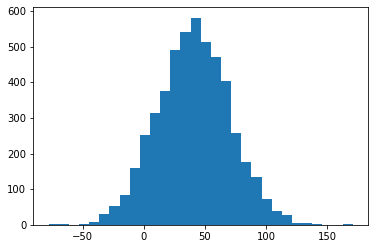

In [101]:
hist(samples_gaussian_cdf2, bins=30)

In [102]:
gaussian_cdf2.fit(samples_gaussian_cdf2)

(40.81376741832007, 29.561296820726426)

In [108]:
gaussian_cdf2.fit(samples_gaussian_cdf)

(39.51457524126386, 29.572918469419214)

**It works when I don't put parameters**

In [94]:
gaussian_cdf.fit(samples_gaussian_cdf)

(1.0003694780024888, 1.0017341616614934, 9.982007327296055, 29.521675314905842)

In [25]:
gaussian_cdf.fit(samples_gaussian_cdf, floc=0)

(1.1663424823237762, 0.8728975508575458, 0, 33.8790332338249)

In [28]:
gaussian_cdf.fit(samples_gaussian_cdf, floc=0, fscale=1)

(1.0497691470400143, 0.9500926401925563, 0, 1)

In [107]:
gaussian_cdf.fit(samples_gaussian_cdf, fmu=40, floc=0, fscale=1)

(40, 2.1437500545114765, 0, 1)

In [106]:
gaussian_cdf.fit(samples_gaussian_cdf, fsigma=30, floc=0, fscale=1)

(39.51464843750007, 30, 0, 1)

### Find the MLE fit

In [10]:
stats.norm.fit(pkg_gaussian_param_samples)

(3.9701950119766494, 3.0147727899740473)

Fixing mean

In [11]:
stats.norm.fit(pkg_gaussian_param_samples, floc=4)

(4, 3.0149201170974615)

In [12]:
stats.norm.fit(pkg_gaussian_param_samples, floc=2)  # fixing it to the wrong value increases variance

(2, 3.601461281255925)

Fixing varianve

In [13]:
stats.norm.fit(pkg_gaussian_param_samples, fscale=3)

(3.9701950119766494, 3)

In [15]:
stats.norm.fit(pkg_gaussian_param_samples, fscale=1)  # fixing it to the wrong value

(3.9701950119766494, 1)

### Plotting the sampled distributions

(-10.0, 10.0)

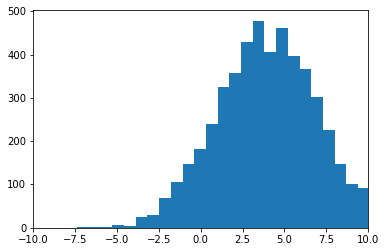

In [18]:
plt.figure()
plt.hist(gaussian_samples)
plt.xlim(-10,10)
plt.figure()
plt.hist(pkg_gaussian_param_samples, bins=30)
plt.xlim(-10,10)
# plt.figure()
# plt.hist(gaussian_param_samples)
# plt.xlim(-10,10)

### Change mean and variance through change in params `loc` and `scale`

(array([ 10.,  21.,  49.,  57.,  95., 110.,  75.,  58.,  20.,   5.]),
 array([-11.84068898,  -8.58811603,  -5.33554308,  -2.08297013,
          1.16960283,   4.42217578,   7.67474873,  10.92732168,
         14.17989463,  17.43246758,  20.68504053]),
 <BarContainer object of 10 artists>)

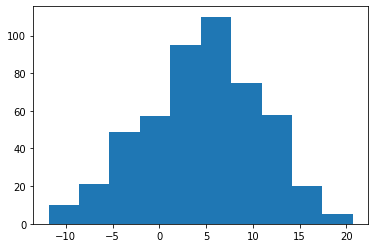

In [7]:
gaussian_samples_mu_sigma = gaussian.rvs(size=500, loc=5, scale=6)
plt.hist(gaussian_samples_mu_sigma)

### integrate the pdf

In [8]:
quad(gaussian.pdf, -2, 2), quad(gaussian_param.pdf, -2, 2, 1)

((0.9544997361036417, 1.8403548653972355e-11),
 (0.9544997361036417, 1.8403548653972355e-11))

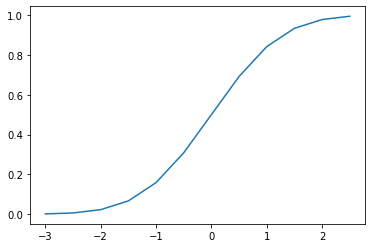

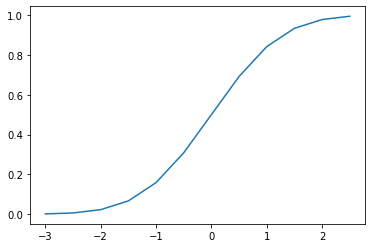

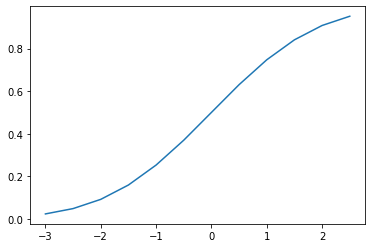

In [9]:
xs = np.arange(-3, 3, 0.5)
plt.plot(xs, gaussian.cdf(xs))
plt.figure()
plt.plot(xs, gaussian_param.cdf(xs, 1))
plt.figure()
plt.plot(xs, gaussian_param.cdf(xs, 1.5))

###  Potentially useful for creating custom distribution with scipy.stats

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html

https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#making-a-continuous-distribution-i-e-subclassing-rv-continuous

https://www.google.com/search?q=python+scipy+stats+custom+distribution&rlz=1C1CHBF_en-GBGB772GB772&oq=python+scipy+stats+custom+distribution&aqs=chrome..69i57j69i60.14530j0j1&sourceid=chrome&ie=UTF-8

Stats functions: https://docs.scipy.org/doc/scipy/reference/stats.html

Subclassing rv_continuous to create a mixture of pdfs(**relevant**): https://stackoverflow.com/questions/42552117/subclassing-of-scipy-stats-rv-continuous

fit rv continuous https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html

mix of dists https://stackoverflow.com/a/47763145/1273751

Marcelo's link about distributions for reaction times: https://lindeloev.github.io/shiny-rt/

## Creating a mixture of exponential and Gaussian

https://stackoverflow.com/a/51947128/1273751
Maybe using the CDF will make it faster

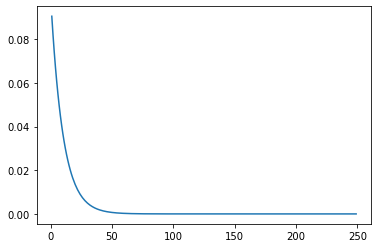

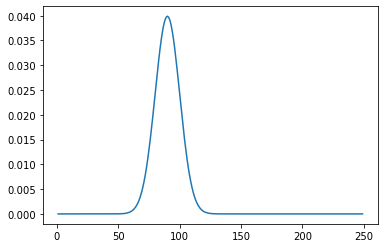

In [10]:
xs = np.arange(1, 250)
plt.plot(xs, stats.expon.pdf(xs, scale=10))
plt.figure()
plt.plot(xs, stats.norm.pdf(xs, loc=90, scale=10))

In [89]:
# class mixture_exp_gaussian_dist(stats.rv_continuous):
#     "Mixture of Exponential and Gaussian distribution"
#     def _pdf(self, x, w, lbd, sigma):
#         return w*lbd*np.exp(-lbd*x) + (1-w) * np.exp(-(x-90)**2/(2*sigma**2)) / (np.sqrt(2*np.pi)*sigma) 

# class mixture_exp_gaussian_dist(stats.rv_continuous):
#     "Mixture of Exponential and Gaussian distribution"
#     def _pdf(self, x, w, exp_scale, sigma):
#         return w*stats.expon.pdf(x, scale=exp_scale) + (1-w) * np.exp(-(x-90)**2/(2*sigma**2)) / (np.sqrt(2*np.pi)*sigma) 

# class mixture_exp_gaussian_dist(stats.rv_continuous):
#     "Mixture of Exponential and Gaussian distribution"
#     def _pdf(self, x, w, exp_scale, sigma):
#         return w*stats.expon.pdf(x, scale=exp_scale) + (1-w) * stats.norm.pdf(x, loc=90, scale=sigma)

class mixture_exp_gaussian_dist(stats.rv_continuous):
    "Mixture of Exponential and Gaussian distribution"
    def _pdf(self, x):
        exp_scale = 10 # lambda
        sigma = 10.
        w = .5
        return w*stats.expon.pdf(x, scale=exp_scale) + (1-w) * stats.norm.pdf(x, loc=90, scale=sigma)
    
mix = mixture_exp_gaussian_dist(name='mixture_exp_gaussian_dist')
mix.numargs, mix.shapes

(0, None)

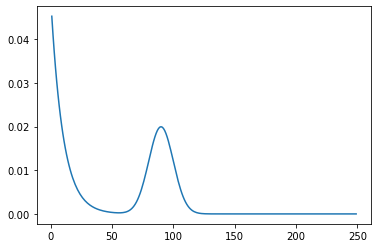

In [90]:
# params
# lbd = 0.1 # lambda
exp_scale = 10 # lambda
# mu = 90
sigma = 10.
w = .5
xs = np.arange(1, 250)

# plt.figure()
# plt.plot(xs, mix.pdf(xs, w, exp_scale, sigma))

plt.figure()
plt.plot(xs, mix.pdf(xs))

# plt.figure()
# plt.plot(mix.cdf(np.arange(1, 50, 0.5), w, exp_scale, sigma))  # NOT SURE WHY THIS RAISES AN OVERFLOW WARNING AND DOES NOT PLOT

Sometimes the sampling below raises "RuntimeError: Failed to converge after 100 iterations."

Maybe it is useful checking for a way to increase the number of interactions

In [81]:
# mix.rvs(w, exp_scale, sigma, size=10)

samples = mix.rvs(size=30)
plt.hist(samples)

RuntimeError: Failed to converge after 100 iterations.

In [ ]:
mix.fit(samples)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([ 5.54563665, 14.53045461, 23.51527257, 32.50009052, 41.48490848,
        50.46972643, 59.45454439, 68.43936234, 77.4241803 , 86.40899825,
        95.39381621]),
 <BarContainer object of 10 artists>)

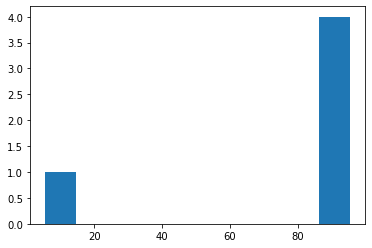

In [207]:
import scipy
from scipy import stats
from scipy.stats import rv_continuous
from scipy.integrate import quad

class mixture_exp_gaussian_dist(stats.rv_continuous):
    "Mixture of Exponential and Gaussian distribution"
    def _pdf(self, x):
        exp_scale = 10 # lambda
        sigma = 5.
        w = .5
        return w*stats.expon.pdf(x, scale=exp_scale) + (1-w) * stats.norm.pdf(x, loc=90, scale=sigma)
    
mix = mixture_exp_gaussian_dist(name='mixture_exp_gaussian_dist')

samples = mix.rvs(size=5)
plt.hist(samples)

If the exponential has parameters, we can integrate it like this:

In [21]:
quad(mix.pdf, 1, 300)[0]

0.9524187090179328

## Cumulative distribution for the mixed by interpolation

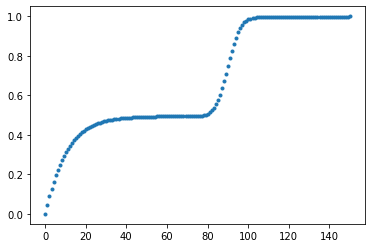

In [208]:
x0=.1
xend=150
xs = np.arange(x0, xend)
xs = list(xs)
ys = [quad(mix.pdf, x0, x)[0] for x in xs]
ys.append(1)
xs.append(xend)
cdf_interpolated = interp1d(xs, ys)
plt.plot(xs, ys, '.')

In [210]:
x = array([0, 10,300, 120, 119, 199.5])
# x = array([1100])
# x = 0.  # error TypeError: 'float' object is not subscriptable
# x = 0  # error TypeError: 'int' object is not subscriptable
def mix_cdf_interp(x):
    if type(x)==ndarray:
        res = zeros(len(x))
    else:
        res = 0
    interpolation_zone=where(logical_and(x>x0, x<xend))
    res[interpolation_zone]=cdf_interpolated(x[interpolation_zone])
    res[where(x>=xend)]=1
    return res
# res
mix_cdf_interp(x)

array([0.        , 0.31100016, 1.        , 0.99502184, 0.99502152,
       1.        ])

In [211]:
class mix_exp_gaussian_interp(stats.rv_continuous):
    "Mixture of Exponential and Gaussian distribution"
    def _cdf(self, x):
        return mix_cdf_interp(x)
    
mix_interp = mix_exp_gaussian_interp(name='mix_interp')
mix_interp.numargs, mix_interp.shapes

(0, None)

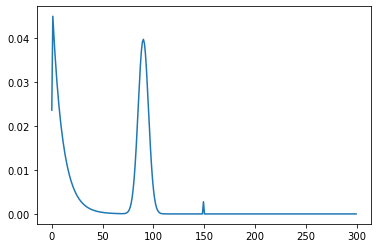

In [212]:
xs=arange(.1, 300)
plot(xs, mix_interp.pdf(xs))

(array([589., 397., 209., 129.,  84.,  42.,  31.,  20.,   9.,   2.,   2.,
          2.,   1.,   0.,   2.,  40., 185., 508., 491., 207.,  32.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  14.]),
 array([1.02839242e-01, 5.09595225e+00, 1.00890653e+01, 1.50821783e+01,
        2.00752913e+01, 2.50684043e+01, 3.00615173e+01, 3.50546303e+01,
        4.00477433e+01, 4.50408563e+01, 5.00339693e+01, 5.50270823e+01,
        6.00201953e+01, 6.50133084e+01, 7.00064214e+01, 7.49995344e+01,
        7.99926474e+01, 8.49857604e+01, 8.99788734e+01, 9.49719864e+01,
        9.99650994e+01, 1.04958212e+02, 1.09951325e+02, 1.14944438e+02,
        1.19937551e+02, 1.24930664e+02, 1.29923777e+02, 1.34916890e+02,
        1.39910003e+02, 1.44903116e+02, 1.49896230e+02]),
 <BarContainer object of 30 artists>)

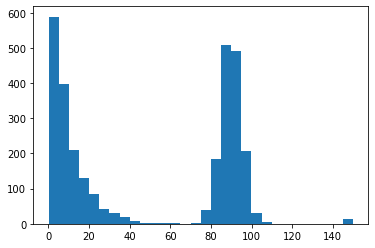

In [218]:
interp_samples = mix_interp.rvs(size=3000)
plt.hist(interp_samples, bins=30)

In [219]:
mix_interp.fit(interp_samples)

(0.0022784366648755166, 0.9996013925014995)

## `rv_continuous` created with standard CDF (best method)

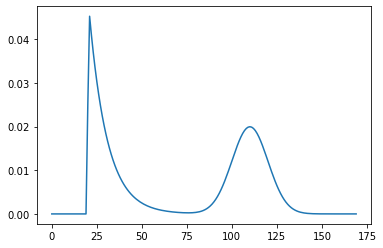

In [29]:
class mix_exp_gaussian_cdf_dist(stats.rv_continuous):
    "Mixture of Exponential and Gaussian distribution"
    def _cdf(self, x, exp_scale, sigma):
#         exp_scale = 10 # lambda
#         sigma = 10.
        w = .5
        return w*stats.expon.cdf(x, scale=exp_scale) + (1-w) * stats.norm.cdf(x, loc=90, scale=sigma)
mix_cdf = mix_exp_gaussian_cdf_dist()
# w = .5
# exp_scale = 10
# sigma=5
xs = arange(-20, 150)
# f = w*stats.expon.cdf(xs, scale=exp_scale) + (1-w) * stats.norm.cdf(xs, loc=90, scale=sigma)
plot(mix_cdf.pdf(xs, exp_scale=10, sigma=10))

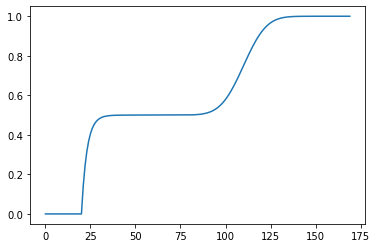

In [4]:
plot(mix_cdf.cdf(xs, exp_scale=3, sigma=10))

In [5]:
mix_cdf.shapes

'exp_scale, sigma'

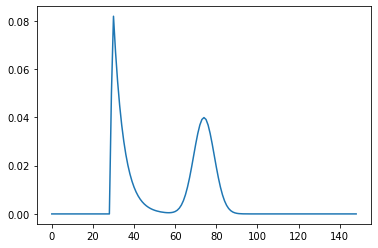

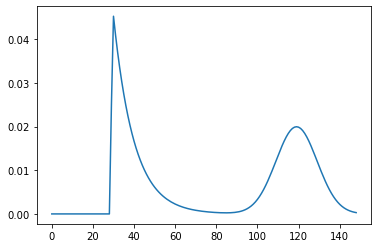

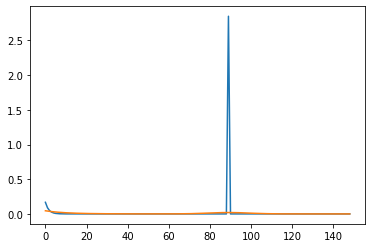

In [6]:
xs2 = arange(1, 150)
plot(mix_cdf.pdf(xs2, exp_scale=10, sigma=10, loc=30, scale=1/2))
figure()
plot(mix_cdf.pdf(xs2, exp_scale=10, sigma=10, loc=30, scale=1))

figure()
plot(mix_cdf.pdf(xs2, exp_scale=1.6, sigma=.07))
plot(mix_cdf.pdf(xs2, exp_scale=10, sigma=10))

In [30]:
cdf_samples = mix_cdf.rvs(exp_scale=10, sigma=10, size=5000)

(array([872., 547., 382., 237., 137., 110.,  59.,  41.,  29.,  16.,   6.,
          9.,   8.,   8.,   3.,  26.,  77., 179., 275., 379., 424., 424.,
        341., 233., 112.,  37.,  20.,   4.,   3.,   2.]),
 array([7.02152456e-03, 4.33342726e+00, 8.65983299e+00, 1.29862387e+01,
        1.73126444e+01, 2.16390502e+01, 2.59654559e+01, 3.02918616e+01,
        3.46182674e+01, 3.89446731e+01, 4.32710788e+01, 4.75974846e+01,
        5.19238903e+01, 5.62502960e+01, 6.05767018e+01, 6.49031075e+01,
        6.92295132e+01, 7.35559190e+01, 7.78823247e+01, 8.22087304e+01,
        8.65351361e+01, 9.08615419e+01, 9.51879476e+01, 9.95143533e+01,
        1.03840759e+02, 1.08167165e+02, 1.12493571e+02, 1.16819976e+02,
        1.21146382e+02, 1.25472788e+02, 1.29799193e+02]),
 <BarContainer object of 30 artists>)

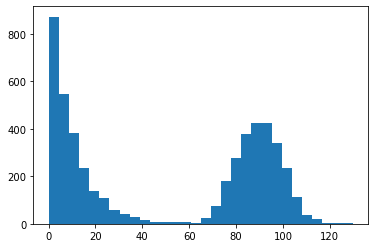

In [31]:
plt.hist(cdf_samples, bins=30)

### Fitting is not working well

In [8]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples)
exp_scale, sigma, loc, scale

/home/homero/software/miniconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/home/homero/software/miniconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


(1.1477461105364068,
 1.3725789097234415,
 -4.341028288772813,
 1.5421148670048872)

In [9]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples, floc=0, fscale=1)
exp_scale, sigma, loc, scale

(1.2242321793414717, 1.2249996304982587, 0, 1)

In [10]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples, fsigma=10, floc=0, fscale=1)
exp_scale, sigma, loc, scale

(9.840722656250021, 10, 0, 1)

In [11]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples, fexp_scale=10, floc=0, fscale=1)
exp_scale, sigma, loc, scale

(10, 9.779980468750018, 0, 1)

## Grid search

In [18]:
cdf_samples

array([9.16783718e+01, 4.86039877e-03, 8.29899898e+01, ...,
       8.03108697e+01, 8.94220725e+01, 9.82177732e+00])

In [2]:
for x in log(mix_cdf.pdf(cdf_samples, exp_scale=3, sigma=3)):
    print(x)

In [134]:
cdf_samples[837], mix_cdf.pdf(cdf_samples[837], exp_scale=3, sigma=3), mix_cdf.pdf(110, exp_scale=3, sigma=3)

(111.18914492202867, 0.0, 5.551115123125782e-12)

In [49]:
ll = log(mix_cdf.pdf(cdf_samples, exp_scale=3, sigma=3))
where(ll==-inf)[0]


<ipython-input-49-7387e4c3aa3c>:1: RuntimeWarning: divide by zero encountered in log
  ll = log(mix_cdf.pdf(cdf_samples, exp_scale=3, sigma=3))
<ipython-input-49-7387e4c3aa3c>:1: RuntimeWarning: invalid value encountered in log
  ll = log(mix_cdf.pdf(cdf_samples, exp_scale=3, sigma=3))


array([ 837, 2117])

<ipython-input-190-3bfb3fb9bd37>:7: RuntimeWarning: divide by zero encountered in log
  ll[i_a, i_b] = sum(log(mix_cdf.pdf(cdf_samples, exp_scale=a, sigma=b)))
<ipython-input-190-3bfb3fb9bd37>:7: RuntimeWarning: invalid value encountered in log
  ll[i_a, i_b] = sum(log(mix_cdf.pdf(cdf_samples, exp_scale=a, sigma=b)))


[10 10]


<ipython-input-190-3bfb3fb9bd37>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(range(1, max_a+1), range(1, max_b+1), ll)
<ipython-input-190-3bfb3fb9bd37>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(range(1, max_a+1), range(1, max_b+1), ll, vmin=-26000)
<ipython-input-190-3bfb3fb9bd37>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the 

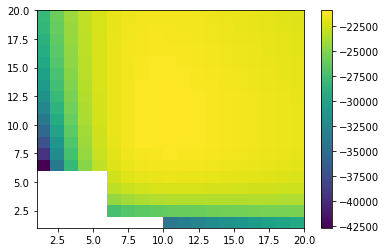

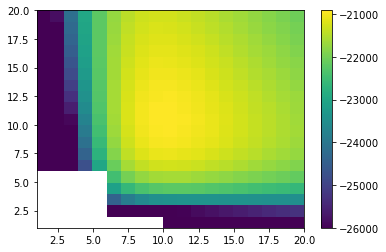

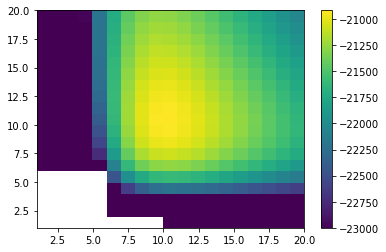

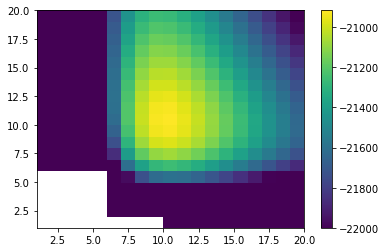

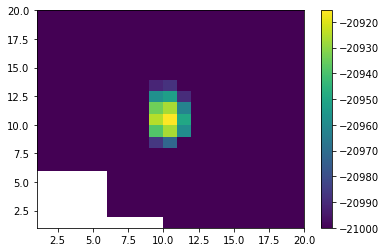

In [190]:
max_a, max_b = 20, 20
ll = zeros((max_a, max_b))
for i_a, a in enumerate(range(1, max_a+1)):
    for i_b, b in enumerate(range(1, max_b+1)):
        ll[i_a, i_b] = sum(log(mix_cdf.pdf(cdf_samples, exp_scale=a, sigma=b)))
        
print(np.array(unravel_index(np.nanargmax(ll), ll.shape))+1)

figure()
pcolor(range(1, max_a+1), range(1, max_b+1), ll)
colorbar()
        
figure()
pcolor(range(1, max_a+1), range(1, max_b+1), ll, vmin=-26000)
colorbar()

figure()
pcolor(range(1, max_a+1), range(1, max_b+1), ll, vmin=-23000)
colorbar()

figure()
pcolor(range(1, max_a+1), range(1, max_b+1), ll, vmin=-22000)
colorbar()

figure()
pcolor(range(1, max_a+1), range(1, max_b+1), ll, vmin=-21000)
colorbar()

In [157]:
def grid_search(samples):
    max_e, max_s= 20, 20
    ll = zeros((max_e, max_s))
    for i_e, e in enumerate(range(1, max_e+1)):
        for i_s, s in enumerate(range(1, max_s+1)):
            ll[i_e, i_s] = sum(log(mix_cdf.pdf(samples, exp_scale=e, sigma=s)))
    return np.array(unravel_index(np.nanargmax(ll), ll.shape))+1

In [152]:
grid_search(cdf_samples_e10_s10)

<ipython-input-145-8fc8b4a82b0a>:6: RuntimeWarning: divide by zero encountered in log
  ll[i_a, i_b] = sum(log(mix_cdf.pdf(samples, exp_scale=a, sigma=b)))
<ipython-input-145-8fc8b4a82b0a>:6: RuntimeWarning: invalid value encountered in log
  ll[i_a, i_b] = sum(log(mix_cdf.pdf(samples, exp_scale=a, sigma=b)))


array([10, 10])

In [154]:
samples = zeros((4,4, 1000))
for i_s, s in enumerate([5, 10, 15, 20]):
    for i_e, e in enumerate([5, 10, 15, 20]):
        samples[i_s, i_e, :] = mix_cdf.rvs(exp_scale=e, sigma=s, size=1000)

In [164]:
true_params = list()
estimated_params = list()
for i_s, s in enumerate([5, 10, 15, 20]):
    for i_e, e in enumerate([5, 10, 15, 20]):
        true_params.append((e,s))
        print((e,s))
        estimated_params.append(grid_search(samples[i_s, i_e, :]))

(5, 5)


<ipython-input-157-8eb56426171a>:6: RuntimeWarning: divide by zero encountered in log
  ll[i_e, i_s] = sum(log(mix_cdf.pdf(samples, exp_scale=e, sigma=s)))
<ipython-input-157-8eb56426171a>:6: RuntimeWarning: invalid value encountered in log
  ll[i_e, i_s] = sum(log(mix_cdf.pdf(samples, exp_scale=e, sigma=s)))


(10, 5)
(15, 5)
(20, 5)
(5, 10)
(10, 10)
(15, 10)
(20, 10)
(5, 15)
(10, 15)
(15, 15)
(20, 15)
(5, 20)
(10, 20)
(15, 20)
(20, 20)


Text(0, 0.5, 'Estimated Gaussian sigma')

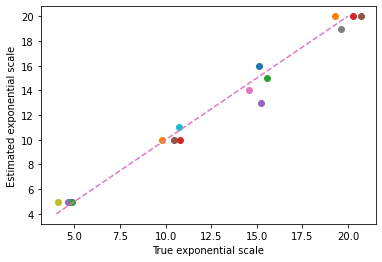

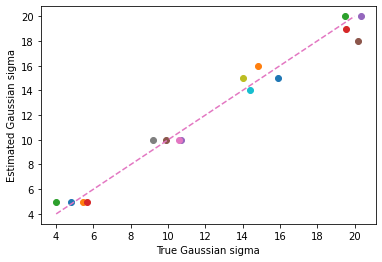

In [189]:
figure()
for i in range(len(true_params)):
    plot(true_params[i][0]+(random.rand()-.5)*2, estimated_params[i][0], 'o')
xlabel("True exponential scale")
ylabel("Estimated exponential scale")
plot([4,20], [4,20], '--')
    
figure()
for i in range(len(true_params)):
    plot(true_params[i][1]+(random.rand()-.5)*2, estimated_params[i][1], 'o')
plot([4,20], [4,20], '--')
xlabel("True Gaussian sigma")
ylabel("Estimated Gaussian sigma")

## exporting samples

(array([170., 117.,  83.,  55.,  24.,  25.,  20.,   9.,   4.,   7.,   2.,
          1.,   1.,   1.,   1.,   4.,  10.,  20.,  25.,  50.,  63.,  74.,
         61.,  71.,  49.,  29.,  15.,   5.,   2.,   2.]),
 array([7.72234347e-02, 4.15388490e+00, 8.23054636e+00, 1.23072078e+01,
        1.63838693e+01, 2.04605307e+01, 2.45371922e+01, 2.86138537e+01,
        3.26905151e+01, 3.67671766e+01, 4.08438380e+01, 4.49204995e+01,
        4.89971610e+01, 5.30738224e+01, 5.71504839e+01, 6.12271453e+01,
        6.53038068e+01, 6.93804683e+01, 7.34571297e+01, 7.75337912e+01,
        8.16104527e+01, 8.56871141e+01, 8.97637756e+01, 9.38404370e+01,
        9.79170985e+01, 1.01993760e+02, 1.06070421e+02, 1.10147083e+02,
        1.14223744e+02, 1.18300406e+02, 1.22377067e+02]),
 <BarContainer object of 30 artists>)

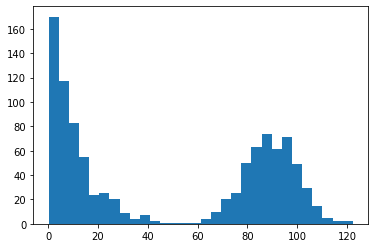

In [151]:
cdf_samples_e10_s10 = mix_cdf.rvs(exp_scale=10, sigma=10, size=1000)
plt.hist(cdf_samples_e10_s10, bins=30)

(array([1739., 1061.,  751.,  473.,  328.,  211.,  136.,   79.,   62.,
          44.,   21.,   14.,    7.,   12.,   22.,   40.,   93.,  207.,
         372.,  579.,  763.,  827.,  762.,  596.,  385.,  236.,  121.,
          44.,   13.,    2.]),
 array([2.74427179e-03, 4.18091402e+00, 8.35908376e+00, 1.25372535e+01,
        1.67154232e+01, 2.08935930e+01, 2.50717627e+01, 2.92499325e+01,
        3.34281022e+01, 3.76062720e+01, 4.17844417e+01, 4.59626115e+01,
        5.01407812e+01, 5.43189509e+01, 5.84971207e+01, 6.26752904e+01,
        6.68534602e+01, 7.10316299e+01, 7.52097997e+01, 7.93879694e+01,
        8.35661391e+01, 8.77443089e+01, 9.19224786e+01, 9.61006484e+01,
        1.00278818e+02, 1.04456988e+02, 1.08635158e+02, 1.12813327e+02,
        1.16991497e+02, 1.21169667e+02, 1.25347837e+02]),
 <BarContainer object of 30 artists>)

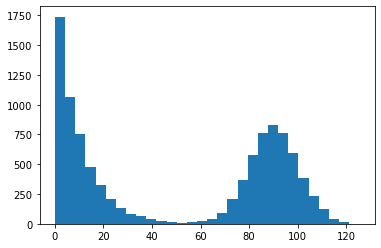

In [9]:
plt.hist(cdf_samples_e10_s10, bins=30)

(array([4.668e+03, 3.840e+02, 2.000e+01, 3.000e+00, 1.000e+01, 3.240e+02,
        1.675e+03, 2.169e+03, 6.950e+02, 5.200e+01]),
 array([3.59401721e-04, 1.25402223e+01, 2.50800851e+01, 3.76199480e+01,
        5.01598109e+01, 6.26996737e+01, 7.52395366e+01, 8.77793995e+01,
        1.00319262e+02, 1.12859125e+02, 1.25398988e+02]),
 <BarContainer object of 10 artists>)

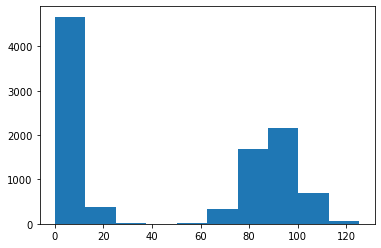

In [146]:
cdf_samples_e5_s10 = mix_cdf.rvs(exp_scale=5, sigma=10, size=10000)
plt.hist(cdf_samples_e5_s10, bins=30)

(array([2.901e+03, 1.247e+03, 5.200e+02, 2.340e+02, 1.020e+02, 4.800e+01,
        1.500e+01, 5.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 8.000e+00, 3.500e+01, 9.600e+01, 1.930e+02,
        3.670e+02, 5.560e+02, 7.520e+02, 7.940e+02, 8.100e+02, 5.650e+02,
        3.840e+02, 2.100e+02, 1.010e+02, 3.800e+01, 9.000e+00, 5.000e+00]),
 array([3.59401721e-04, 4.18031369e+00, 8.36026798e+00, 1.25402223e+01,
        1.67201766e+01, 2.09001308e+01, 2.50800851e+01, 2.92600394e+01,
        3.34399937e+01, 3.76199480e+01, 4.17999023e+01, 4.59798566e+01,
        5.01598109e+01, 5.43397651e+01, 5.85197194e+01, 6.26996737e+01,
        6.68796280e+01, 7.10595823e+01, 7.52395366e+01, 7.94194909e+01,
        8.35994452e+01, 8.77793995e+01, 9.19593537e+01, 9.61393080e+01,
        1.00319262e+02, 1.04499217e+02, 1.08679171e+02, 1.12859125e+02,
        1.17039079e+02, 1.21219034e+02, 1.25398988e+02]),
 <BarContainer object of 30 artists>)

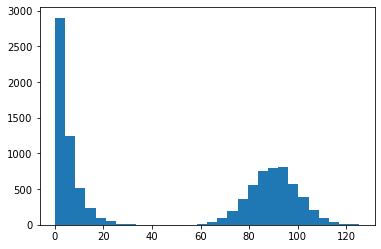

In [148]:
plt.hist(cdf_samples_e5_s10, bins=30)

(array([1512., 1061.,  707.,  504.,  358.,  266.,  158.,  110.,   77.,
          69.,   41.,   31.,   17.,   13.,    4.,    8.,    3.,    4.,
           3.,    4.,   13.,   85.,  415.,  911., 1343., 1262.,  698.,
         256.,   57.,   10.]),
 array([4.89313461e-04, 3.63052570e+00, 7.26056210e+00, 1.08905985e+01,
        1.45206349e+01, 1.81506713e+01, 2.17807077e+01, 2.54107441e+01,
        2.90407804e+01, 3.26708168e+01, 3.63008532e+01, 3.99308896e+01,
        4.35609260e+01, 4.71909624e+01, 5.08209988e+01, 5.44510352e+01,
        5.80810716e+01, 6.17111080e+01, 6.53411444e+01, 6.89711807e+01,
        7.26012171e+01, 7.62312535e+01, 7.98612899e+01, 8.34913263e+01,
        8.71213627e+01, 9.07513991e+01, 9.43814355e+01, 9.80114719e+01,
        1.01641508e+02, 1.05271545e+02, 1.08901581e+02]),
 <BarContainer object of 30 artists>)

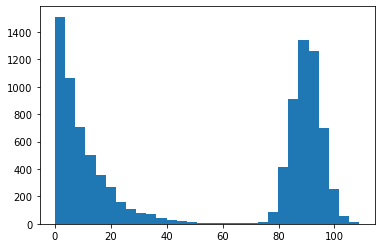

In [141]:
cdf_samples_e10_s5 = mix_cdf.rvs(exp_scale=10, sigma=5, size=10000)
plt.hist(cdf_samples_e10_s5, bins=30)

In [14]:
with open('cdf_samples_e10_s5.npy', 'wb') as f:
    np.save(f, cdf_samples_e10_s5)
with open('cdf_samples_e10_s10.npy', 'wb') as f:
    np.save(f, cdf_samples_e10_s10)
with open('cdf_samples_e5_s10.npy', 'wb') as f:
    np.save(f, cdf_samples_e5_s10)
# with open('cdf_samples_e10_s5.npy', 'rb') as f:
#     a = np.load(f)
#     b = np.load(f)

In [15]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples_e10_s5, floc=0, fscale=1)
exp_scale, sigma, loc, scale

/home/homero/software/miniconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/home/homero/software/miniconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


(9.905856956074004, 4.998050678514522, 0, 1)

In [16]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples_e10_s10, floc=0, fscale=1)
exp_scale, sigma, loc, scale

(1.1404788265308277, 1.0304254112431412, 0, 1)

In [17]:
exp_scale, sigma, loc, scale = mix_cdf.fit(cdf_samples_e5_s10, floc=0, fscale=1)
exp_scale, sigma, loc, scale

(1.0424404875623914, 1.0968755191400232, 0, 1)